<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;"> Introduction</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    
<b>Objective</b><br>
    
    
We are tasked to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 
<br>   
    
<b>About the Dataset</b>   <br>
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. 
    <br>
    Working as a data scientist with the analytics vertical of Scaler, we got this dataset from the Scaler database.<br><br>
      The dataset contains following features:
    <ul>
     <li> Product Purchased: 	KP281, KP481, or KP781
 <li>   Age: 	In years
 <li>   Gender: 	Male/Female
 <li>   Education: 	In years
 <li>   MaritalStatus: 	Single or partnered
 <li>   Usage: 	The average number of times the customer plans to use the treadmill each week.
 <li>   Income: 	Annual income (in $)
 <li>   Fitness: 	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
 <li>   Miles: 	The average number of miles the customer expects to walk/run each week



</ul><br>
There are 180 data points and 9 features.
<br><br>
    
<b>Expected points :</b><br>
<ul>
    <li> Customer Segmentation
    <li> EDA
</ul>

</div>  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [3]:
print("Dimensions of dataset ",data.shape)

data.head()

Dimensions of dataset  (180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<b> Checking for Null Values in dataset</b>

In [5]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Data contains nno null values.
    </p>
    </div>

In [6]:
data['Product'] = data['Product'].replace({'KP281':'A', 'KP481':'B', 'KP781':'C'})

In [7]:
for i in data.columns:
    print(i,' : ', data[i].nunique())

Product  :  3
Age  :  32
Gender  :  2
Education  :  8
MaritalStatus  :  2
Usage  :  6
Fitness  :  5
Income  :  62
Miles  :  37


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Type of features:
    <ul>
        <li> Categorical features -> [Product ,Gender, Education, MaritalStatus, Usage, Fitness]
        <li> Continous features -> [Age, Income, Miles] 
    </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">EDA</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Univariate Analysis</b></p>
    </div>

<b>Checking Distribution for Continuous features</b>

In [8]:
contin_columns = ['Age', 'Income', 'Miles']

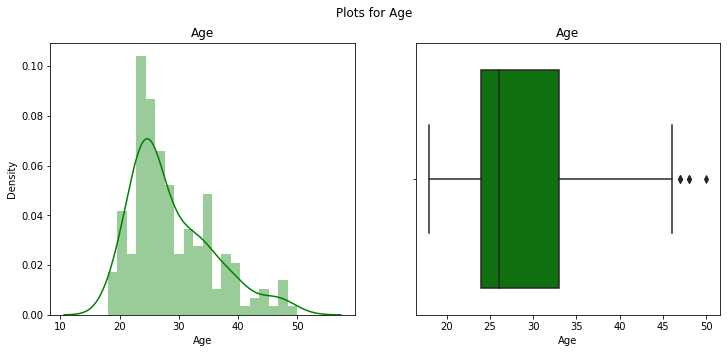

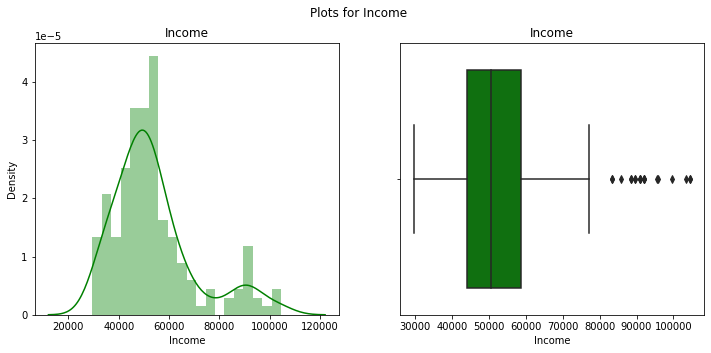

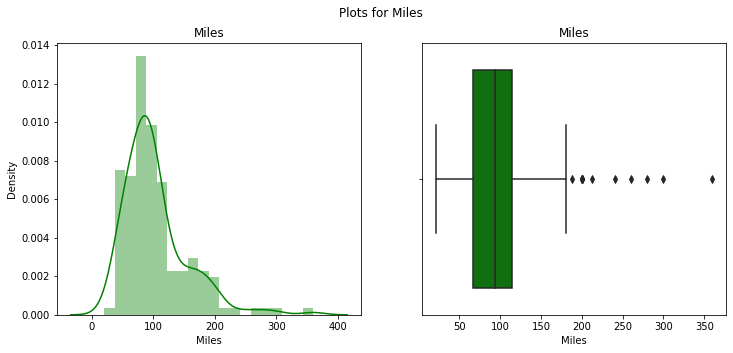

In [9]:
for i in contin_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle('Plots for '+i)
    sns.distplot(data[i],bins=20,ax=ax[0],color='green').set(title = i)
    sns.boxplot(data[i],ax=ax[1],color='green').set(title = i)
    plt.show()

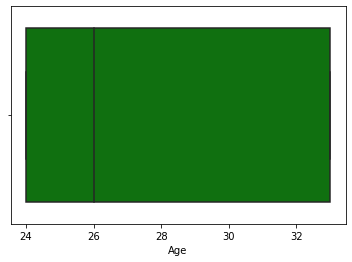

In [10]:
col = 'Age'

data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='green')
plt.show()


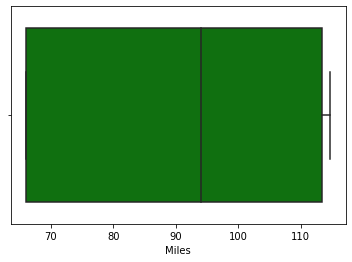

In [11]:
col = 'Miles'
data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='green')
plt.show()


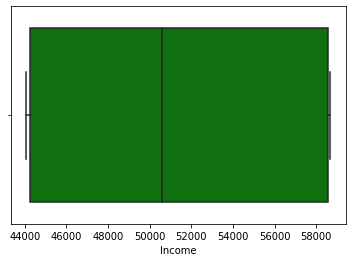

In [12]:
col = 'Income'
data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='green')
plt.show()


In [13]:
cols = ['Miles'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
df = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df.shape

(180, 9)

<b>Checking Categorical features</b>

In [15]:
cat_cols = ['Product' ,'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']

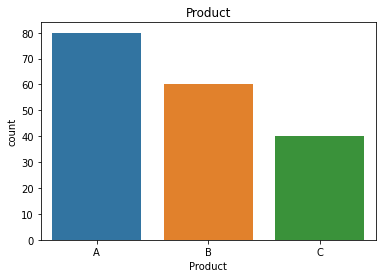

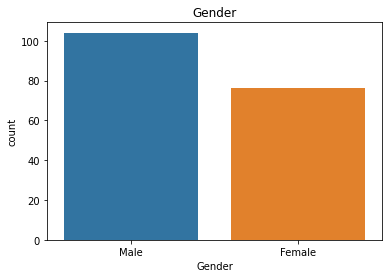

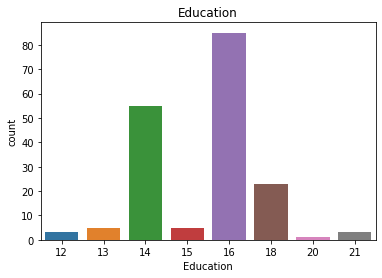

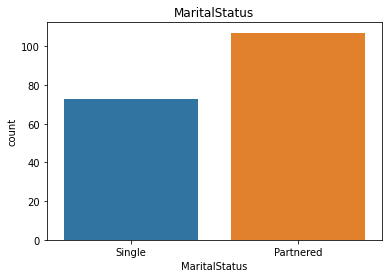

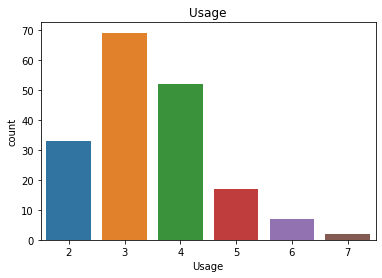

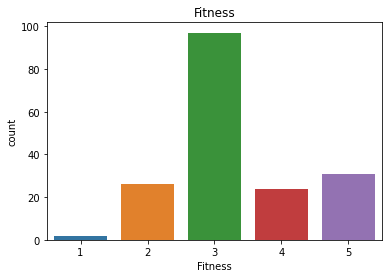

In [16]:
for i in cat_cols:
    sns.countplot(data[i]).set(title=i)
    plt.show()
    print()
    print()

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Multivariate Analysis</b></p>
    </div>

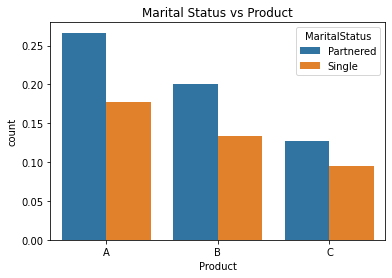

In [17]:
tmp = data[['MaritalStatus','Product']]
tmp['count'] = 1
tmp = tmp.groupby(['MaritalStatus','Product']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='MaritalStatus',y='count',x='Product').set(title='Marital Status vs Product')
plt.show()

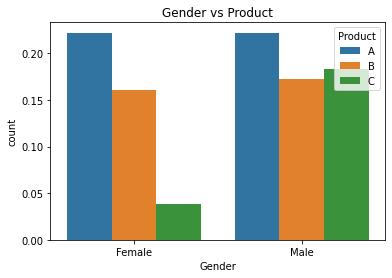

In [18]:
tmp = data[['Gender','Product']]
tmp['count'] = 1
tmp = tmp.groupby(['Gender','Product']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,x='Gender',y='count',hue='Product').set(title='Gender vs Product')
plt.show()

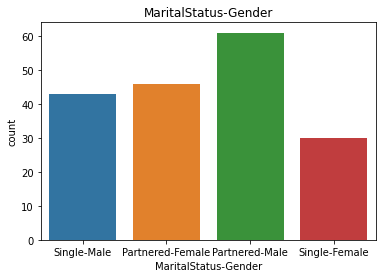

In [19]:
cols = ['MaritalStatus','Gender']
tmp = data[cols]

name = "-".join(cols)
tmp[name] = tmp['MaritalStatus'] + '-' + tmp['Gender']

sns.countplot(data=tmp,x=name).set(title=name)
plt.show()

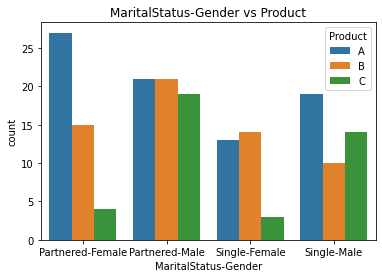

In [20]:
cols = ['MaritalStatus','Gender']



tmp = data[cols+['Product']]
name = "-".join(cols)

tmp[name] = tmp['MaritalStatus'] + '-' + tmp['Gender']
tmp['count'] = 1
tmp = tmp.groupby([name,'Product']).count()['count'].reset_index()
tmp
sns.barplot(data=tmp,x=name,hue='Product',y='count').set(title=name +' vs Product')
plt.show()

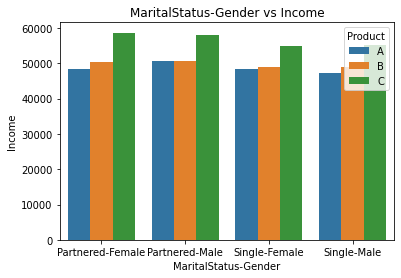

In [21]:
cols = ['MaritalStatus','Gender']

name = "-".join(cols)


tmp = data[cols+['Product','Income']]
tmp[name] = tmp['MaritalStatus'] + '-' + tmp['Gender']

tmp = tmp.groupby([name,'Product']).mean()['Income'].reset_index()

sns.barplot(data=tmp,x=name,hue='Product',y='Income').set(title=name +' vs Income')
plt.show()

<AxesSubplot:xlabel='Age_grp', ylabel='count'>

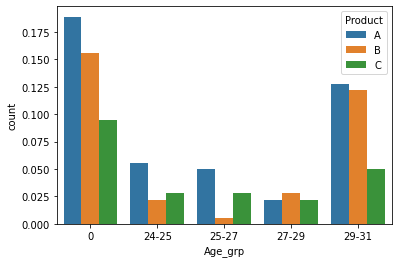

In [22]:
col = 'Age'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1])) + '-' + str(int(grps[i]))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

<AxesSubplot:xlabel='Income_grp', ylabel='count'>

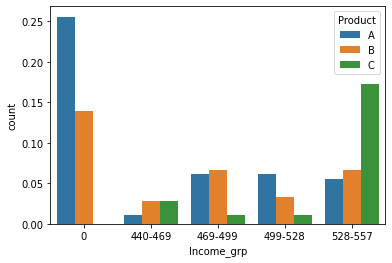

In [23]:
col = 'Income'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1]/100)) + '-' + str(int(grps[i]/100))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()

total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

<AxesSubplot:xlabel='Miles_grp', ylabel='count'>

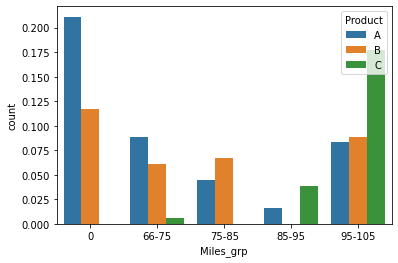

In [24]:
col = 'Miles'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1])) + '-' + str(int(grps[i]))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total
sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

<AxesSubplot:xlabel='Product', ylabel='count'>

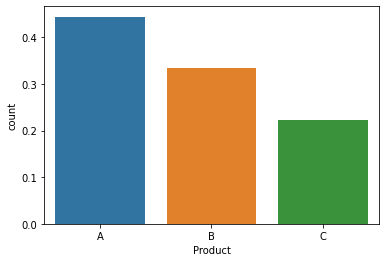

In [25]:
tmp = data[['Product']]
tmp['count'] =1

tmp = tmp.groupby('Product').sum()['count'].reset_index()

total = sum(tmp['count'])
tmp['count'] = tmp['count']/total
sns.barplot(data=tmp,x='Product',y='count')

In [26]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_grp,Income_grp,Miles_grp
0,A,24.0,Male,14,Single,3,4,44058.75,112.00,0,0,95-105
1,A,24.0,Male,15,Single,2,3,44058.75,75.00,0,0,0
2,A,24.0,Female,14,Partnered,4,3,44058.75,66.00,0,0,0
3,A,24.0,Male,12,Single,3,3,44058.75,85.00,0,0,66-75
4,A,24.0,Male,13,Partnered,4,2,44058.75,66.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,C,33.0,Male,21,Single,6,5,58668.00,114.75,29-31,528-557,95-105
176,C,33.0,Male,18,Single,5,4,58668.00,114.75,29-31,528-557,95-105
177,C,33.0,Male,16,Single,5,5,58668.00,114.75,29-31,528-557,95-105
178,C,33.0,Male,18,Partnered,4,5,58668.00,114.75,29-31,528-557,95-105


<AxesSubplot:xlabel='Miles', ylabel='Fitness'>

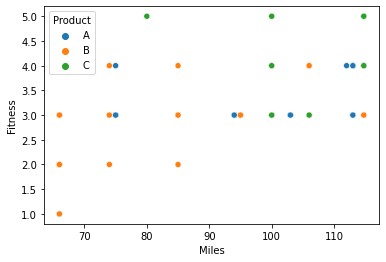

In [27]:
sns.scatterplot(data=data,x='Miles',y='Fitness',hue='Product')

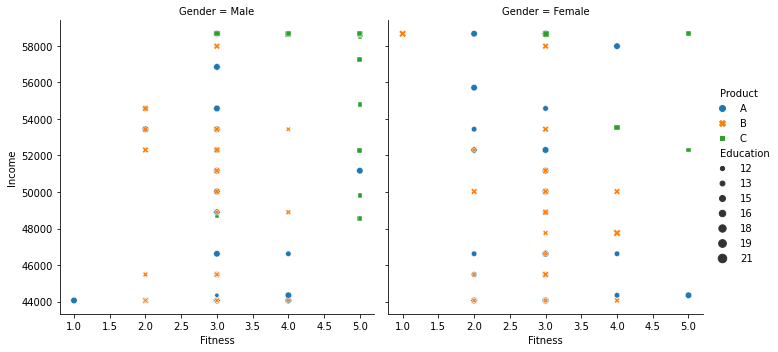

In [28]:
sns.relplot(
    data=data,
    x="Fitness", y="Income", col="Gender",
    hue="Product", style="Product", size="Education",
)

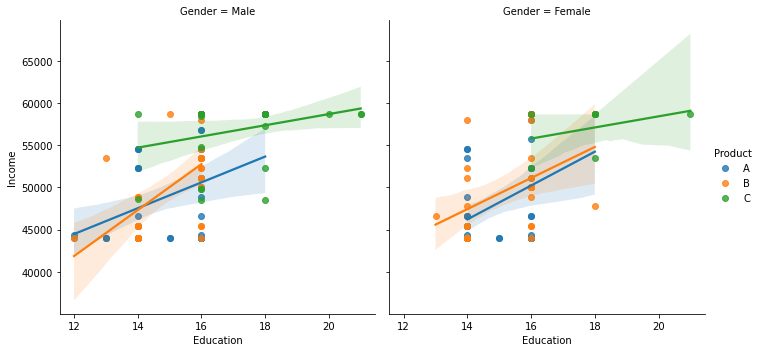

In [29]:
sns.lmplot(data=data, y="Income", x="Education", col="Gender", hue="Product")

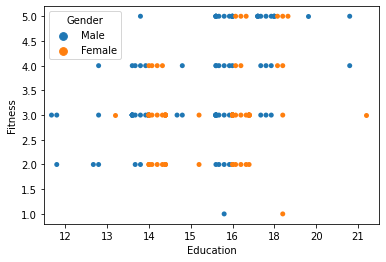

In [30]:
ax = sns.swarmplot(x="Education", y="Fitness", data=data,dodge=True,hue='Gender')

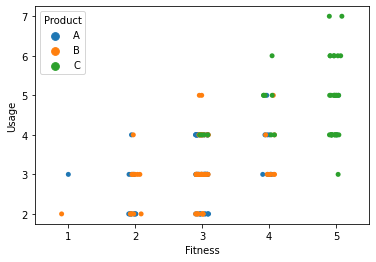

In [31]:
ax = sns.stripplot(x="Fitness", y="Usage", hue="Product", data=data)

<b> Actions and Insights </b>

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Type of features:
    <ul>
        <li> Categorical features -> [Product ,Gender, Education, MaritalStatus, Usage, Fitness]
        <li> Continous features -> [Age, Income, Miles] 
    </p>
    </div>

In [95]:
def create_contigency(col1,col2,data):
    df = pd.crosstab(data[col1],data[col2], normalize='index')
    print("Conditional Probability : P({}|{})".format(col2,col1))
    display(df)
    
    print()
    print()
    
    df = pd.crosstab(data[col1],data[col2], normalize='columns')
    print("Conditional Probability : P({}|{})".format(col1,col2))
    display(df)
    
    
    df = pd.crosstab(data[col1],data[col2],margins=True)
   
    display(df)
    
    print()
    
    


In [96]:
create_contigency('Fitness','Education',data)

Conditional Probability : P(Education|Fitness)


Education,12,13,14,15,16,18,20,21
Fitness,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
2,0.038462,0.076923,0.423077,0.038462,0.423077,0.000000,0.000000,0.000000
3,0.020619,0.020619,0.360825,0.030928,0.515464,0.041237,0.000000,0.010309
4,0.000000,0.041667,0.333333,0.041667,0.333333,0.208333,0.000000,0.041667
5,0.000000,0.000000,0.032258,0.000000,0.483871,0.419355,0.032258,0.032258




Conditional Probability : P(Fitness|Education)


Education,12,13,14,15,16,18,20,21
Fitness,,,,,,,,
1,0.000000,0.0,0.000000,0.0,0.011765,0.043478,0.0,0.000000
2,0.333333,0.4,0.200000,0.2,0.129412,0.000000,0.0,0.000000
3,0.666667,0.4,0.636364,0.6,0.588235,0.173913,0.0,0.333333
4,0.000000,0.2,0.145455,0.2,0.094118,0.217391,0.0,0.333333
5,0.000000,0.0,0.018182,0.0,0.176471,0.565217,1.0,0.333333


Education,12,13,14,15,16,18,20,21,All
Fitness,,,,,,,,,
1,0,0,0,0,1,1,0,0,2
2,1,2,11,1,11,0,0,0,26
3,2,2,35,3,50,4,0,1,97
4,0,1,8,1,8,5,0,1,24
5,0,0,1,0,15,13,1,1,31
All,3,5,55,5,85,23,1,3,180


In [91]:
from statsmodels.stats.contingency_tables import Table

In [92]:
k = Table.from_data(data[['Usage','Fitness']])

In [94]:
k.marginal_probabilities[0]

(Usage
 2    0.182796
 3    0.370968
 4    0.282258
 5    0.096774
 6    0.045699
 7    0.021505
 dtype: float64,
 Fitness
 1    0.021505
 2    0.147849
 3    0.526882
 4    0.134409
 5    0.169355
 dtype: float64)